In [345]:
import pandas as pd
import numpy as np

In [346]:
df = pd.read_csv('covtype.csv')
print(len(df))
df.head()

581012


,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [394]:
print(df.columns, len(df.columns))
y = df.Cover_type

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_distance_to_hydrology',
       'Vertical_distance_to_hydrology', 'Horizontal_distance_to_roadways',
       'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm',
       'Horizontal_distance_to_fire', 'Wilderness_area1', 'Wilderness_area2',
       'Wilderness_area3', 'Wilderness_area4', 'Soil_Type1', 'Soil_Type2',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cov

Have to de-one-hot-encode for just the eda process. Will use original data afterwards.

In [348]:
temp = pd.from_dummies(df.iloc[:,10:14]).rename(columns={'':'Wilderness_area'})
temp = temp.replace("Wilderness_area1", 1)
temp = temp.replace("Wilderness_area2", 2)
temp = temp.replace("Wilderness_area3", 3)
temp = temp.replace("Wilderness_area4", 4) 
temp.Wilderness_area.value_counts()
temp.head()

C:\Users\Alex Manioudakis\AppData\Local\Temp\ipykernel_22008\898707270.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace("Wilderness_area4", 4)


,Wilderness_area
0,1
1,1
2,1
3,1
4,1


Now for the soil columns

In [349]:
temp_soil = pd.from_dummies(df.iloc[:, 14:54]).rename(columns={'':'Soil_type'})


In [350]:
for i in range(1,41):
    temp_soil = temp_soil.replace(f'Soil_Type{i}', i)
temp_soil['Soil_type'].head()

C:\Users\Alex Manioudakis\AppData\Local\Temp\ipykernel_22008\3478535466.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_soil = temp_soil.replace(f'Soil_Type{i}', i)


0    29
1    29
2    12
3    30
4    29
Name: Soil_type, dtype: int64

Now for joining them all into my final EDA df

In [393]:
eda = df.drop(df.columns[10:], axis = 1)

eda = eda.join([temp, temp_soil, y])
print(eda.columns, len(eda.columns))
eda.head()


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_distance_to_hydrology',
       'Vertical_distance_to_hydrology', 'Horizontal_distance_to_roadways',
       'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm',
       'Horizontal_distance_to_fire', 'Wilderness_area', 'Soil_type',
       'Cover_type'],
      dtype='object') 13


,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire,Wilderness_area,Soil_type,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,29,5


<Axes: >

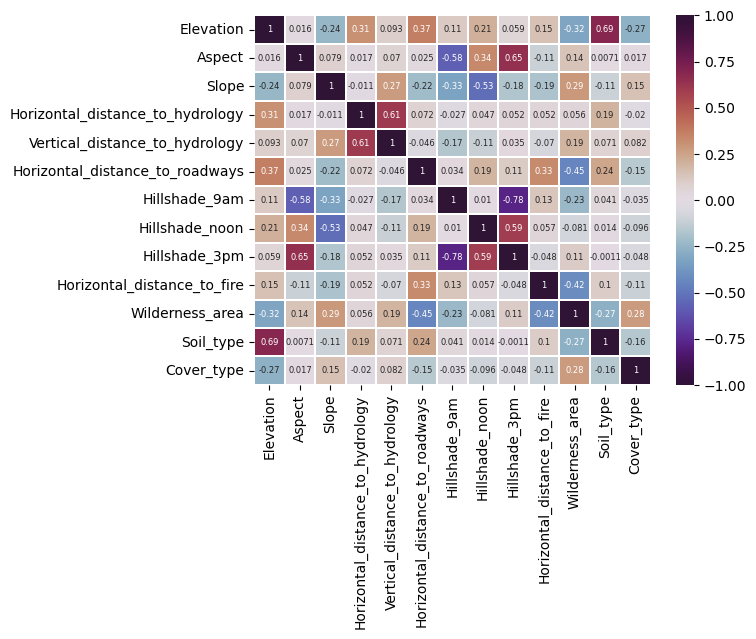

In [352]:
#correlation matrix
#note: done before normalizing the variables just to take a good look at everything right off the bat
#ignore 
import seaborn as sns

corr_matrix = eda.corr(method='pearson', min_periods=1)

sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=0.1, annot_kws={"fontsize":6}, cmap='twilight_shifted')

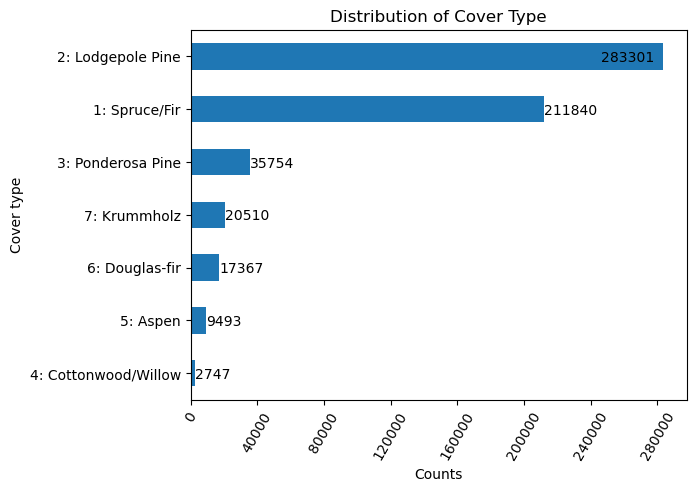

In [353]:
import matplotlib.pyplot as plt

cover_type_dict = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

#target variable histogram
eda['Cover_type'].value_counts(ascending=True).plot.barh(rot=0)
plt.title('Distribution of Cover Type')
plt.ylabel('Cover type')
plt.yticks(ticks = range(0,7), labels=[str(i)+': '+cover_type_dict[i] for i in list(eda.Cover_type.value_counts(ascending=True).keys())], rotation = 0)
plt.xticks(ticks=range(0,300000, 40000), rotation=60)
plt.xlabel('Counts')
for index, value in enumerate(eda['Cover_type'].value_counts(ascending=True)):
    if value>250000:
        plt.text(value/1.15, index-.1, str(value))
    else:
        plt.text(value, index-.1, str(value))
plt.show()

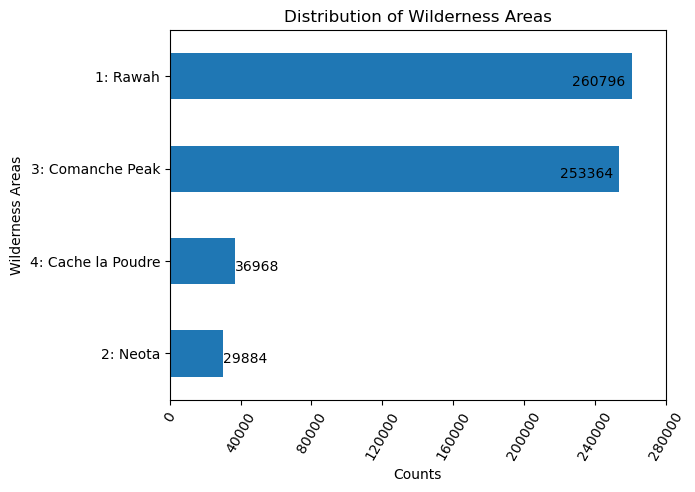

In [354]:
wilderness_area_dict = {
    1: 'Rawah',
    2: 'Neota',
    3: 'Comanche Peak',
    4: 'Cache la Poudre'
}

#target variable histogram
eda['Wilderness_area'].value_counts(ascending=True).plot.barh(rot=0)
plt.title('Distribution of Wilderness Areas')
plt.ylabel('Wilderness Areas')
plt.yticks(ticks = range(0,4), labels=[str(i)+': '+wilderness_area_dict[i] for i in list(eda.Wilderness_area.value_counts(ascending=True).keys())], rotation = 0)
plt.xticks(ticks=range(0,300000, 40000), rotation=60)
plt.xlabel('Counts')
for index, value in enumerate(eda['Wilderness_area'].value_counts(ascending=True)):
    if value>250000:
        plt.text(value/1.15, index-.1, str(value))
    else:
        plt.text(value, index-.1, str(value))
plt.show()

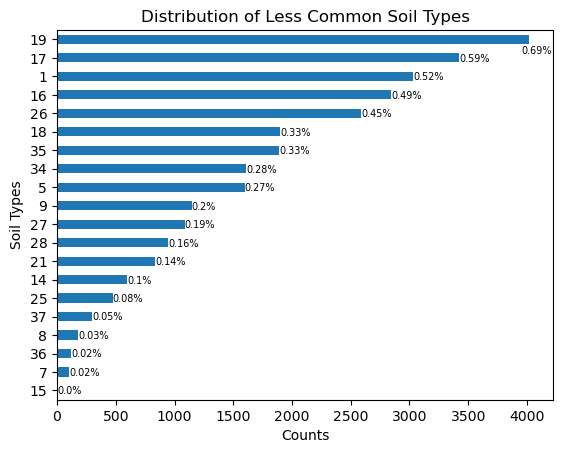

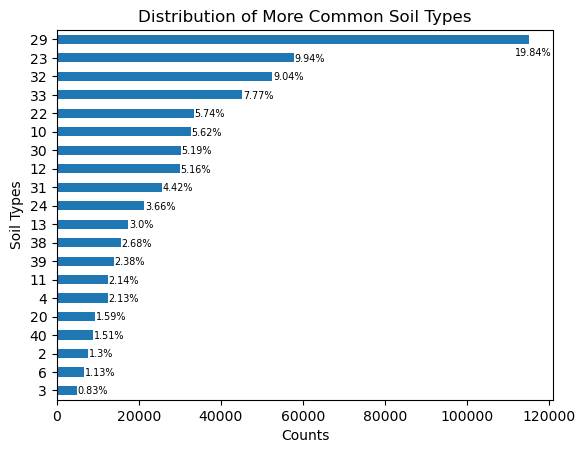

In [355]:
#target variable histogram
eda['Soil_type'].value_counts(ascending=True)[0:20].plot.barh(rot=0)
plt.title('Distribution of Less Common Soil Types')
plt.ylabel('Soil Types')
plt.xlabel('Counts')
for index, value in enumerate(eda['Soil_type'].value_counts(ascending=True)[0:20]):
    if value >3700:
        plt.text(value-70, index-.8, f'{round(value/len(eda)*100, 2)}%', fontsize='x-small')
    else:
        plt.text(value, index-.2, f'{round(value/len(eda)*100, 2)}%', fontsize='x-small')
plt.show()
plt.show()

eda['Soil_type'].value_counts(ascending=True)[20:40].plot.barh(rot=0)
plt.title('Distribution of More Common Soil Types')
plt.ylabel('Soil Types')
plt.xlabel('Counts')
for index, value in enumerate(eda['Soil_type'].value_counts(ascending=True)[20:40]):
    if value >100000:
        plt.text(value-3500, index-.9, f'{round(value/len(eda)*100, 2)}%', fontsize='x-small')
    else:
        plt.text(value+200, index-.2, f'{round(value/len(eda)*100, 2)}%', fontsize='x-small')
plt.show()

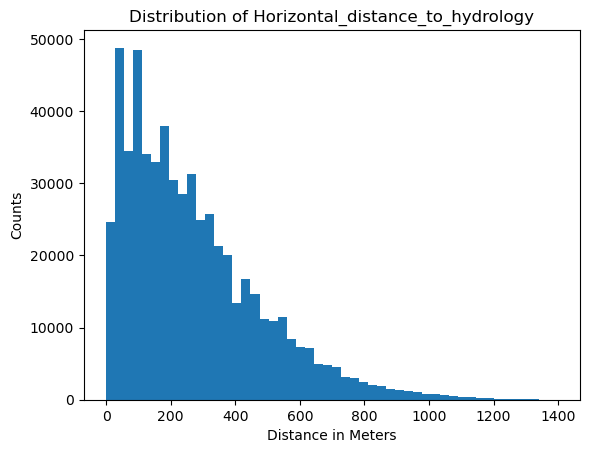

count    581012.000000
mean        269.428217
std         212.549356
min           0.000000
25%         108.000000
50%         218.000000
75%         384.000000
max        1397.000000
Name: Horizontal_distance_to_hydrology, dtype: float64


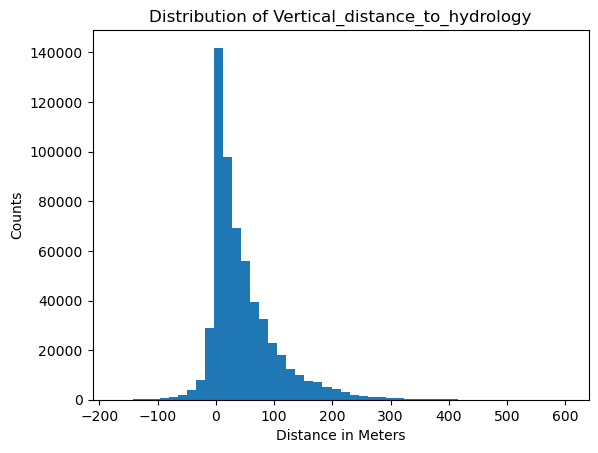

count    581012.000000
mean         46.418855
std          58.295232
min        -173.000000
25%           7.000000
50%          30.000000
75%          69.000000
max         601.000000
Name: Vertical_distance_to_hydrology, dtype: float64


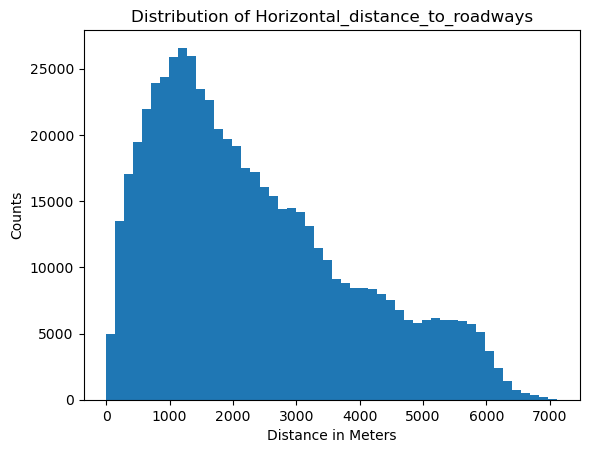

count    581012.000000
mean       2350.146611
std        1559.254870
min           0.000000
25%        1106.000000
50%        1997.000000
75%        3328.000000
max        7117.000000
Name: Horizontal_distance_to_roadways, dtype: float64


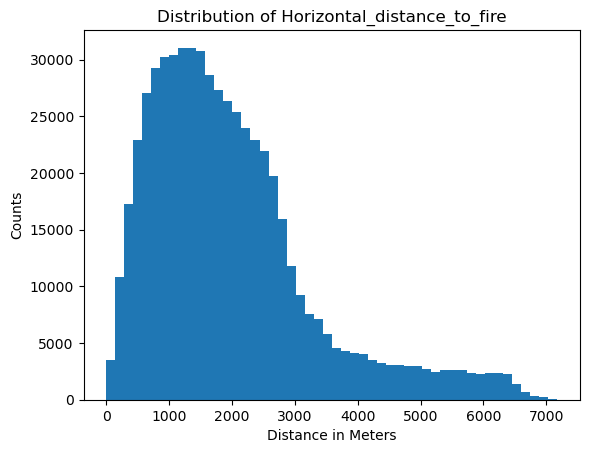

count    581012.000000
mean       1980.291226
std        1324.195210
min           0.000000
25%        1024.000000
50%        1710.000000
75%        2550.000000
max        7173.000000
Name: Horizontal_distance_to_fire, dtype: float64


In [356]:
# for loops to makes histograms of features adapted to x units
for i in eda.columns[3:6]:
    plt.hist(eda[i],bins=50)
    plt.title(f'Distribution of {i}')
    plt.xlabel('Distance in Meters')
    plt.ylabel('Counts')
    plt.show()
    print(eda[i].describe())

plt.hist(eda['Horizontal_distance_to_fire'], bins=50)
plt.title('Distribution of Horizontal_distance_to_fire')
plt.xlabel('Distance in Meters')
plt.ylabel('Counts')
plt.show()
print(eda['Horizontal_distance_to_fire'].describe())

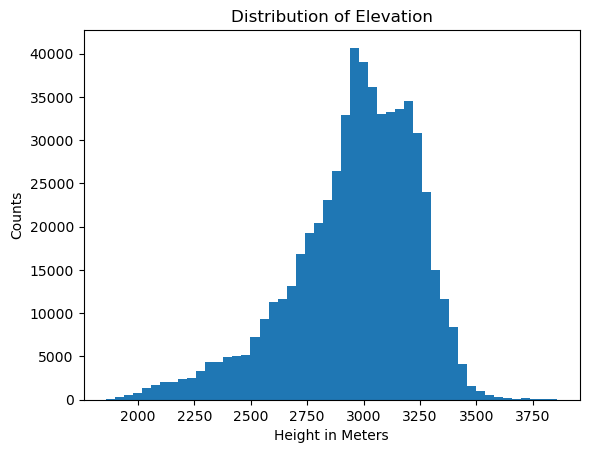

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64


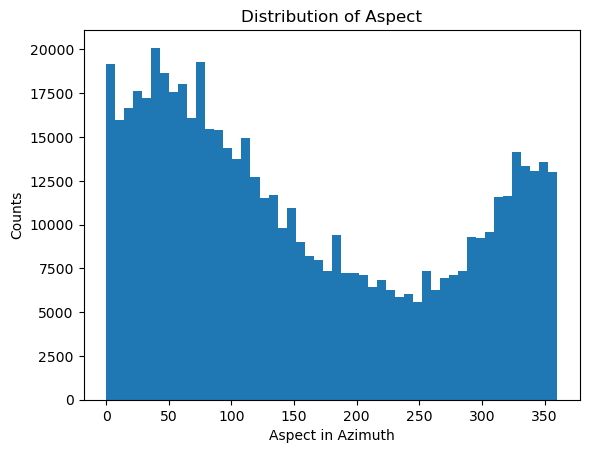

count    581012.000000
mean        155.656807
std         111.913721
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64


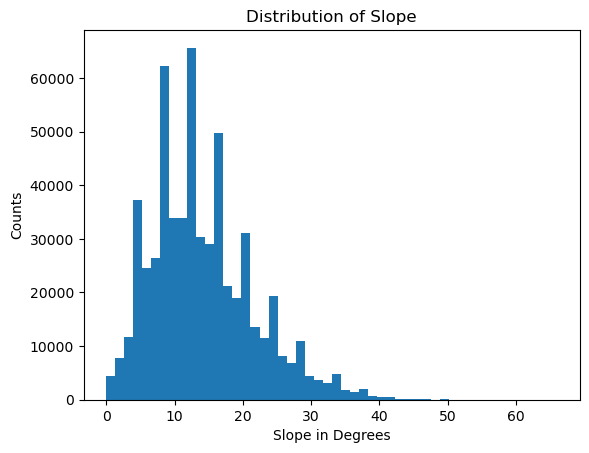

count    581012.000000
mean         14.103704
std           7.488242
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64


In [378]:
#3 features: elevation, aspect, slope
plt.hist(eda['Elevation'], bins=50)
plt.title('Distribution of Elevation')
plt.xlabel('Height in Meters')
plt.ylabel('Counts')
plt.show()
print(eda['Elevation'].describe())

plt.hist(eda['Aspect'], bins=50)
plt.title('Distribution of Aspect')
plt.xlabel('Aspect in Azimuth')
plt.ylabel('Counts')
plt.show()
print(eda['Aspect'].describe())

plt.hist(eda['Slope'], bins=50)
plt.title('Distribution of Slope')
plt.xlabel('Slope in Degrees')
plt.ylabel('Counts')
plt.show()
print(eda['Slope'].describe())

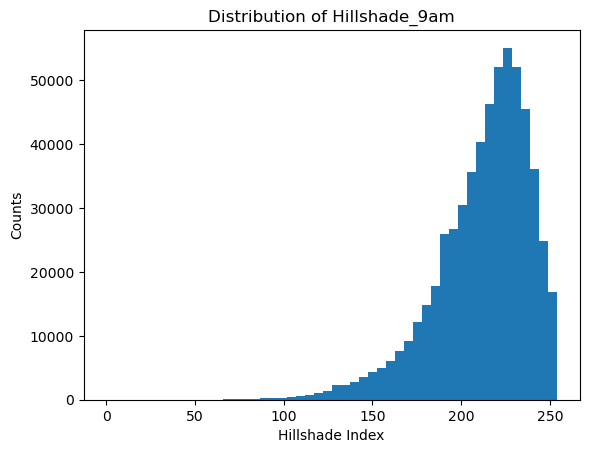

count    581012.000000
mean        212.146049
std          26.769889
min           0.000000
25%         198.000000
50%         218.000000
75%         231.000000
max         254.000000
Name: Hillshade_9am, dtype: float64


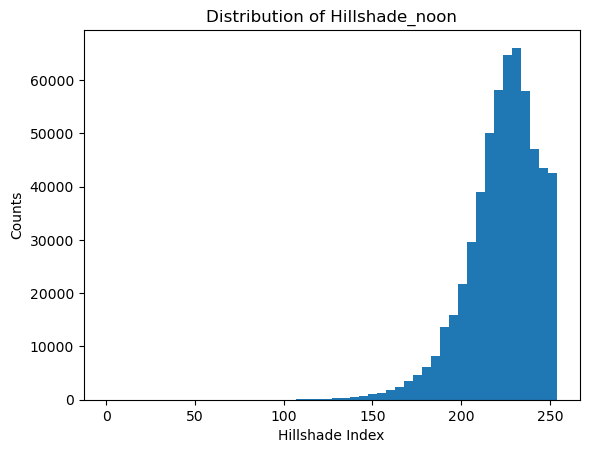

count    581012.000000
mean        223.318716
std          19.768697
min           0.000000
25%         213.000000
50%         226.000000
75%         237.000000
max         254.000000
Name: Hillshade_noon, dtype: float64


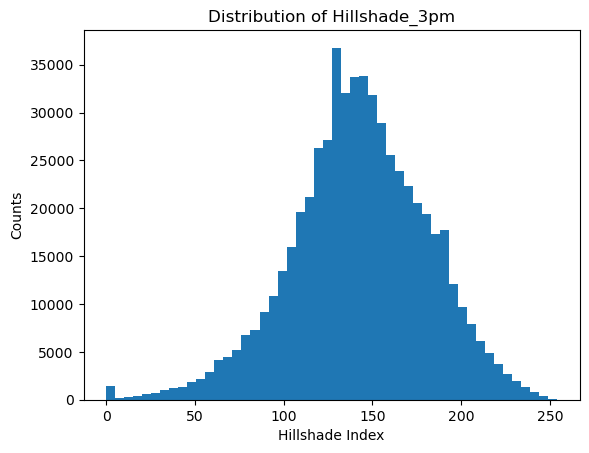

count    581012.000000
mean        142.528263
std          38.274529
min           0.000000
25%         119.000000
50%         143.000000
75%         168.000000
max         254.000000
Name: Hillshade_3pm, dtype: float64


In [358]:
#the hillshade histograms
for i in eda.columns[6:9]:
    plt.hist(eda[i],bins=50)
    plt.title(f'Distribution of {i}')
    plt.xlabel(f'Hillshade Index')
    plt.ylabel('Counts')
    plt.show()
    print(eda[i].describe())

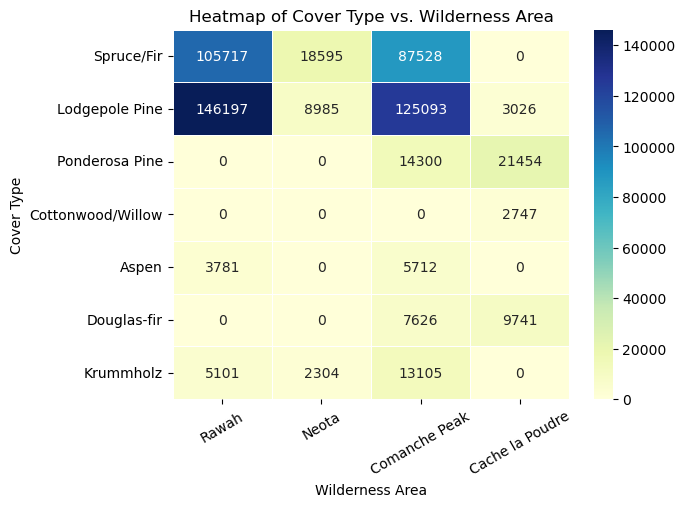

In [359]:
crosstab_wilderness = pd.crosstab(eda['Cover_type'], eda['Wilderness_area'])

#heatmap for wilderness and covertype
sns.heatmap(crosstab_wilderness, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, fmt='g')
plt.title('Heatmap of Cover Type vs. Wilderness Area')
plt.xlabel('Wilderness Area')
plt.xticks(ticks=[i + .5 for i in range(0,4)], labels=list(wilderness_area_dict.values()), rotation=30)
plt.yticks(ticks=[i + .5 for i in range(0, 7)], labels=list(cover_type_dict.values()),rotation=0)
plt.ylabel('Cover Type')
plt.show()

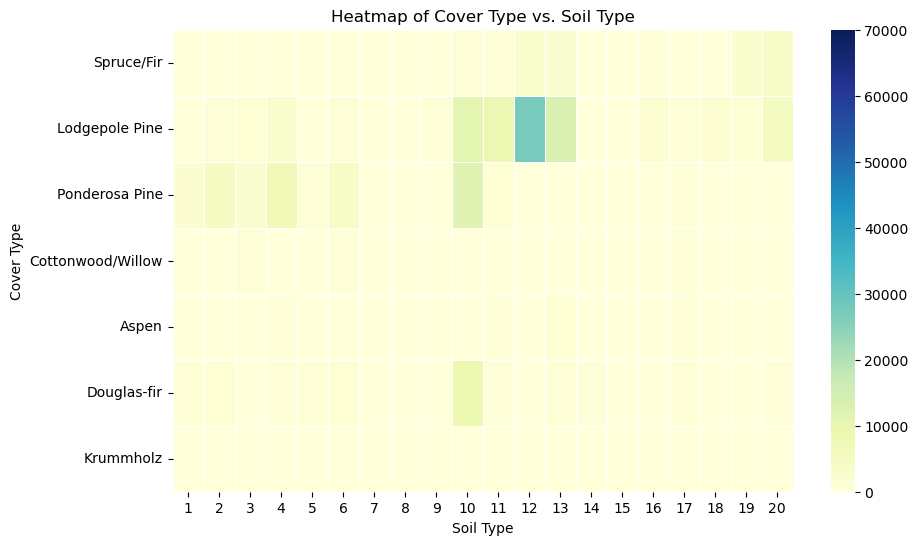

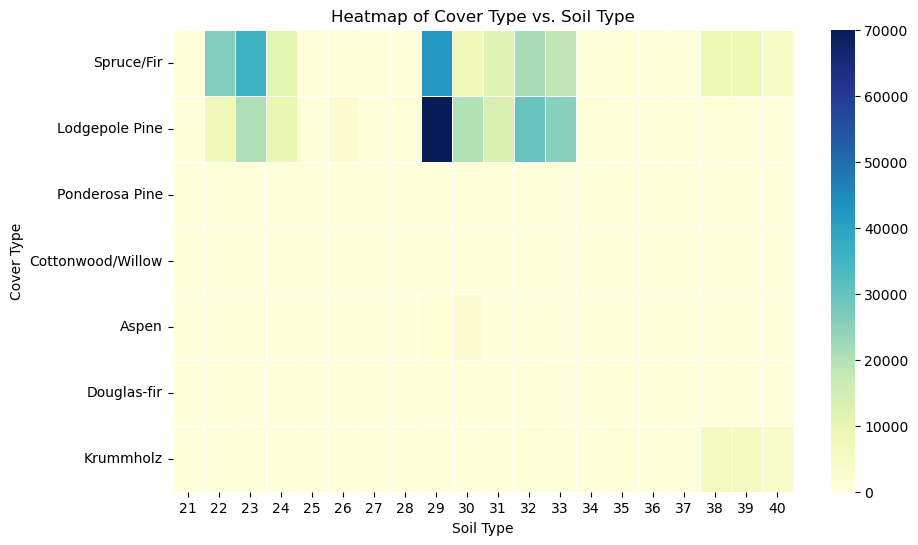

In [374]:
crosstab_soil = pd.crosstab(eda['Cover_type'], eda['Soil_type'])
crosstab_soil1 = crosstab_soil.iloc[:, :20]
crosstab_soil2 = crosstab_soil.iloc[:, 20:]

#heatmaps for soil and covertype
plt.figure(figsize=(10,6))
sns.heatmap(crosstab_soil1, annot=False, cmap="YlGnBu", cbar=True, linewidths=0.5, fmt='g', vmax=70000, vmin=0)
plt.title('Heatmap of Cover Type vs. Soil Type')
plt.xlabel('Soil Type')
plt.yticks(ticks=[i + .5 for i in range(0, 7)], labels=list(cover_type_dict.values()),rotation=0)
plt.ylabel('Cover Type')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(crosstab_soil2, annot=False, cmap="YlGnBu", cbar=True, linewidths=0.5, fmt='g', vmax=70000, vmin=0)
plt.title('Heatmap of Cover Type vs. Soil Type')
plt.xlabel('Soil Type')
plt.yticks(ticks=[i + .5 for i in range(0, 7)], labels=list(cover_type_dict.values()),rotation=0)
plt.ylabel('Cover Type')
plt.show()


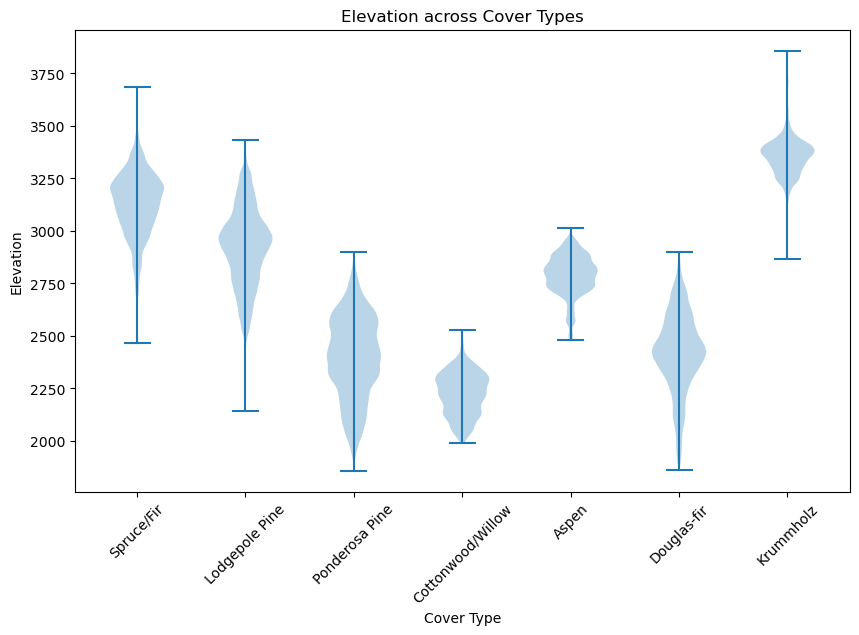

In [379]:
violins =[]
for i in sorted(eda.Cover_type.unique()):
    violins.append(eda[eda['Cover_type'] == i]['Elevation'].values)

plt.figure(figsize=(10, 6))

plt.violinplot(dataset = violins)
plt.xticks([i + 1 for i in range(0,7)],labels = list(cover_type_dict.values()), rotation = 45)
plt.ylabel('Elevation')
plt.xlabel('Cover Type')
plt.title('Elevation across Cover Types')
plt.show()
    

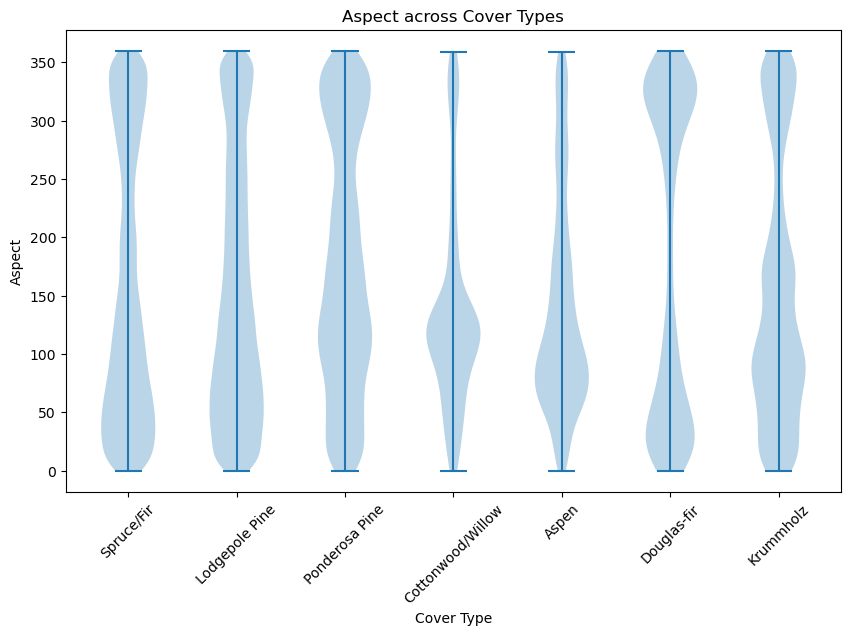

In [382]:
violins =[]
for i in sorted(eda.Cover_type.unique()):
    violins.append(eda[eda['Cover_type'] == i]['Aspect'].values)

plt.figure(figsize=(10, 6))

plt.violinplot(dataset = violins)
plt.xticks([i + 1 for i in range(0,7)],labels = list(cover_type_dict.values()), rotation = 45)
plt.ylabel('Aspect')
plt.xlabel('Cover Type')
plt.title('Aspect across Cover Types')
plt.show()

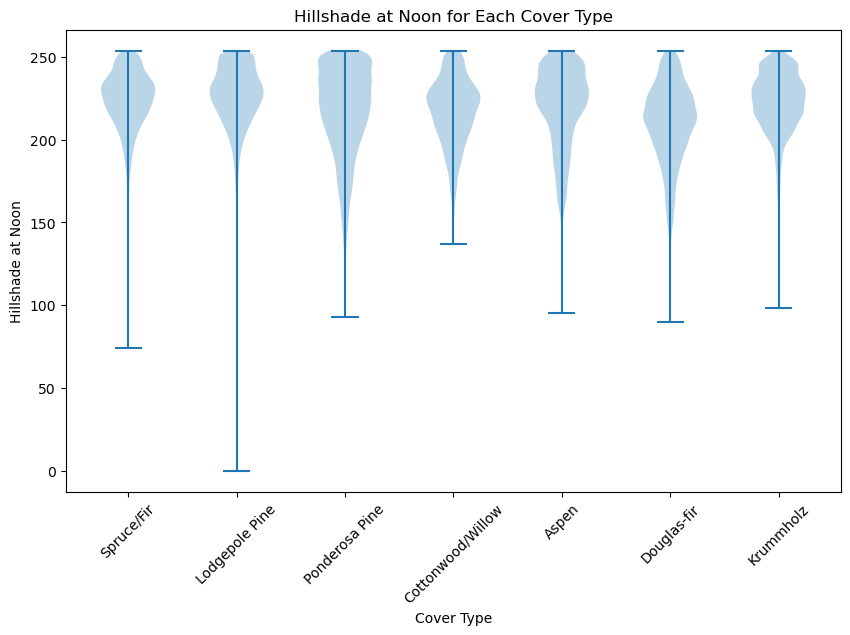

In [383]:
violins =[]
for i in sorted(eda.Cover_type.unique()):
    violins.append(eda[eda['Cover_type'] == i]['Hillshade_noon'].values)

plt.figure(figsize=(10, 6))

plt.violinplot(dataset = violins)
plt.xticks([i + 1 for i in range(0,7)],labels = list(cover_type_dict.values()), rotation = 45)
plt.ylabel('Hillshade at Noon')
plt.xlabel('Cover Type')
plt.title('Hillshade at Noon for Each Cover Type')
plt.show()

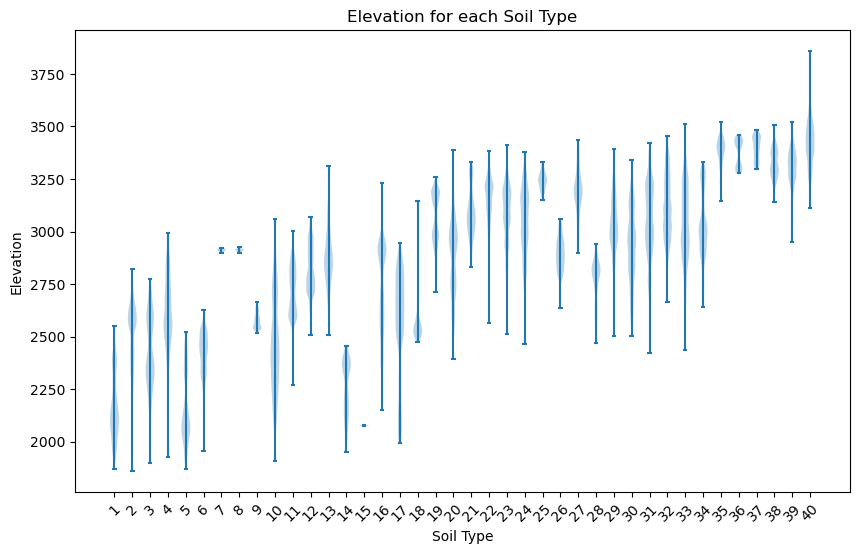

In [384]:
violins =[]
for i in sorted(eda.Soil_type.unique()):
    violins.append(eda[eda['Soil_type'] == i]['Elevation'].values)

plt.figure(figsize=(10, 6))

plt.violinplot(dataset = violins)
plt.xticks([i + 1 for i in range(0,40)],labels = sorted(eda.Soil_type.unique()), rotation = 45)
plt.ylabel('Elevation')
plt.xlabel('Soil Type')
plt.title('Elevation for each Soil Type')
plt.show()

In [365]:
#now doing Chi squared tests for the 3 categorical variables
#unlikely to yield great results due to high counts of zeroes in some categories of the crosstab
from scipy.stats import chi2_contingency

#first for the target variable
#between Cover Type and Soil Type
contingency_table_1 = pd.crosstab(eda['Cover_type'], eda['Soil_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table_1)

print("Chi-squared test between Cover Type and Soil Type:")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

print("------")
#between Cover Type and Wilderness Area
contingency_table_2 = pd.crosstab(eda['Cover_type'], eda['Wilderness_area'])
chi2, p, dof, expected = chi2_contingency(contingency_table_2)

print("Chi-squared test between Cover Type and Wilderness Area:")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

print("------")
#now for the 2 non-target variables
#between Soil Type and Wilderness Area
contingency_table_3 = pd.crosstab(eda['Soil_type'], eda['Wilderness_area'])
chi2, p, dof, expected = chi2_contingency(contingency_table_3)

print("Chi-squared test between Soil Type and Wilderness Area:")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

Chi-squared test between Cover Type and Soil Type:
Chi2: 762246.5215596666, p-value: 0.0, Degrees of Freedom: 234
------
Chi-squared test between Cover Type and Wilderness Area:
Chi2: 342443.42784904334, p-value: 0.0, Degrees of Freedom: 18
------
Chi-squared test between Soil Type and Wilderness Area:
Chi2: 819289.809222796, p-value: 0.0, Degrees of Freedom: 117


In [367]:
import scipy.stats as stats
group1 = df[df['Wilderness_area1'] == 1]['Elevation']
group2 = df[df['Wilderness_area2'] == 1]['Elevation']
group3 = df[df['Wilderness_area3'] == 1]['Elevation']
group4 = df[df['Wilderness_area4'] == 1]['Elevation']
f_stat, p_value = stats.f_oneway(group2, group4)
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')    

F-statistic: 820521.4195016457
P-value: 0.0


__**SPLITTING AND PREPROCESSING**__

In [368]:
#back to working with original df because categoricals are already one-hot encoded
df.head()

,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [369]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df[df != 'Cover_type']
print(y.head())
X.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_type, dtype: int64


,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [405]:
#Because a lot of the data is imbalanced, I will be using stratification in the splitting process
random_state = 42

#stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

#StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

print('Training size', y_train.shape, f'({round(y_train.shape[0]/len(y),4)*100}%)')
print('Validation Size', y_val.shape, f'({round(y_val.shape[0]/len(y),4)*100}%)')
print('Testing Size', y_test.shape, f'({round(y_test.shape[0]/len(y),4)*100}%)')

test balance: (array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([42368, 56661,  7151,   549,  1899,  3473,  4102], dtype=int64))
new fold
(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([127104, 169980,  21452,   1649,   5695,  10420,  12306],
      dtype=int64))
(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([42368, 56660,  7151,   549,  1899,  3474,  4102], dtype=int64))
new fold
(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([127104, 169980,  21453,   1648,   5695,  10421,  12306],
      dtype=int64))
(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([42368, 56660,  7150,   550,  1899,  3473,  4102], dtype=int64))
new fold
(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([127104, 169980,  21452,   1648,   5696,  10421,  12306],
      dtype=int64))
(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([42368, 56660,  7151,   550,  1898,  3473,  4102], dtype=int64))
new fold
(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([127104, 169980,  21452,   1649,   5696,  10420,  12306]

**Preprocessing Pipeline After Splitting**

In [371]:
#have to split the one-hot-encoded features away from the ones I will preprocess for appending after preprocessing
one_hot_x_train = X_train.drop(X_train.columns[0:10], axis = 1)
one_hot_x_val = X_val.drop(X_val.columns[0:10], axis = 1)
one_hot_x_test = X_val.drop(X_val.columns[0:10], axis = 1)


In [372]:
minmax_ftrs = ['Aspect', 'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm']
std_ftrs = ['Elevation', 'Slope', 'Horizontal_distance_to_hydrology', 
            'Vertical_distance_to_hydrology', 
            'Horizontal_distance_to_roadways', 'Horizontal_distance_to_fire']


preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = pd.DataFrame(clf.fit_transform(X_train), 
                            columns=X_train.columns[0:10]).join(one_hot_x_train)
X_val_prep = pd.DataFrame(clf.transform(X_val), 
                          columns=X_val.columns[0:10]).join(one_hot_x_val)
X_test_prep = pd.DataFrame(clf.transform(X_test), 
                           columns=X_test.columns[0:10]).join(one_hot_x_test)

print(X_train.shape)
print(X_train_prep.shape)
print('---')
print(X_val.shape)
print(X_val_prep.shape)
print('---')
print(X_test.shape)
print(X_test_prep.shape)



(348607, 55)
(348607, 55)
---
(116202, 55)
(116202, 55)
---
(116203, 55)
(116203, 55)


['Elevation', 'Aspect', 'Slope', 'Horiz_Dist_to_water', 'Vert_Dist_to_water', 'Horiz_dist_to_road', 'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm', 'Horiz_dist_to_fire', 'Wilderness_area1', 'Wilderness_area2', 'Wilderness_area3', 'Wilderness_area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_type']


Text(0.5, 1.0, 'Correlation Matrix of Preprocessed Training Data')

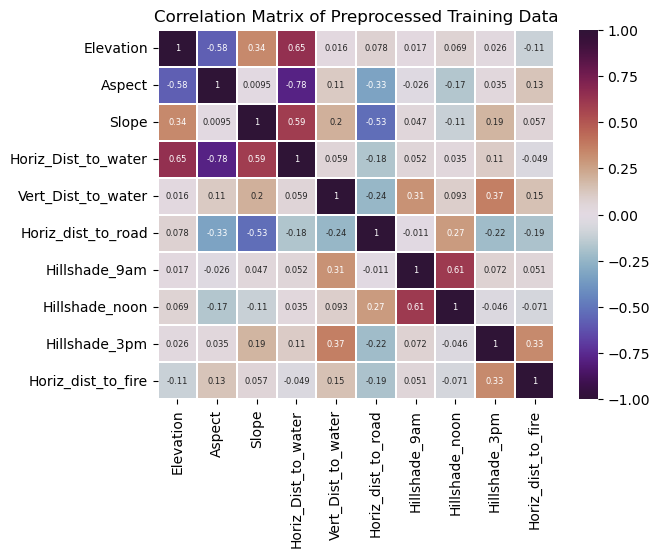

In [402]:
labels = list(X_train_prep.columns)
labels[3], labels[4], labels[5], labels[9] = 'Horiz_Dist_to_water', 'Vert_Dist_to_water', 'Horiz_dist_to_road', 'Horiz_dist_to_fire'
print(labels)
corr_matrix = X_train_prep.iloc[:, 0:10].corr(method='pearson', min_periods=1)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=0.1, annot_kws={"fontsize":6}, cmap='twilight_shifted', xticklabels=labels[0:10], yticklabels=labels[0:10])
plt.title('Correlation Matrix of Preprocessed Training Data')